In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [26]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")
print(data.columns)

Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
       'btc_trade_count', 'btc_vwap', 'year', 'month', 'dayofmonth',
       'dayofyear', 'weekday', 'date', 'wntr_month', 'month_label', 'quarter',
       'season', 'days', 'rolling_30', 'btc_vwap_lag_1', 'btc_vwap_lag_3',
       'btc_vwap_lag_5', 'btc_vwap_lag_15', 'btc_vwap_lag_45',
       'btc_vwap_lag_60', 'btc_vwap_lag_90', 'dayofyear_sin', 'dayofyear_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')


In [27]:
target_data = data['btc_vwap'].copy()
train_data = data.drop(['btc_vwap', 'date'], axis=1)


            Feature  Importance
27      weekday_cos    0.000000
26      weekday_sin    0.000000
8        dayofmonth    0.000000
10          weekday    0.000000
15             days    0.014636
11       wntr_month    0.266145
12      month_label    0.398020
5   btc_trade_count    0.432296
13          quarter    0.487474
14           season    0.496480
28        month_sin    0.510287
29        month_cos    0.580659
4        btc_volume    0.622353
6              year    0.637811
24    dayofyear_sin    0.923385
7             month    0.957183
25    dayofyear_cos    1.023637
23  btc_vwap_lag_90    1.112669
21  btc_vwap_lag_45    1.227847
22  btc_vwap_lag_60    1.259506
9         dayofyear    1.445642
20  btc_vwap_lag_15    1.510746
16       rolling_30    1.760243
19   btc_vwap_lag_5    1.779408
18   btc_vwap_lag_3    1.984615
17   btc_vwap_lag_1    2.542772
0          btc_open    2.838244
3         btc_close    3.125052
2           btc_low    3.167664
1          btc_high    3.273173


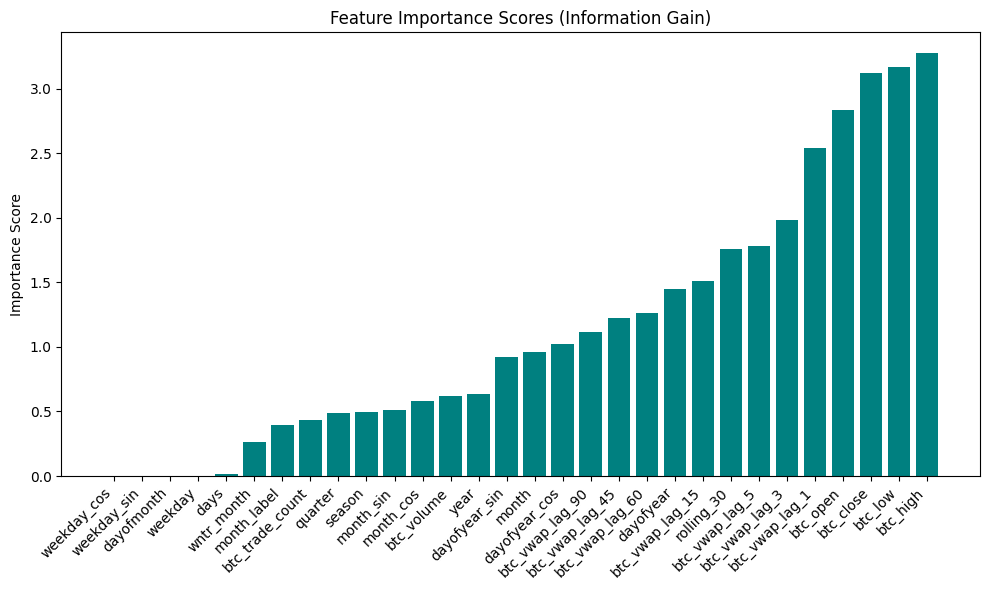

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Assuming you have train_data and target_data defined earlier
X = train_data
y = target_data

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': ig})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Changed to ascending=True

# Print the feature importance scores and the sorted features
print(feature_importance_df)

# Plot a vertical bar chart of the feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Feature Importance Scores (Information Gain)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
